# A2Q3

# Q1

In [1]:
# import packages needed for data processing, learning and plotting
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

## Prepare Data

In [2]:
# Create a data class such that it ranges from -2 to 2
data = np.array([[-2+0.2*i, -2+0.2*j] for i in range(21) for j in range(21)])
np.random.seed(1)
np.random.shuffle(data)
# Label data in -1 for result>1 and +1: result<=1
label = np.array([1 if x[0]**2+x[1]**2 <= 1 else -1 for x in data])

# split the data sets into 80% for training and 20% for  testing
sep = len(data)//5
test_data = data[:sep]
test_label = label[:sep].reshape(-1,1)
train_data = data[sep:]
train_label = label[sep:].reshape(-1,1)

## View the data distribution

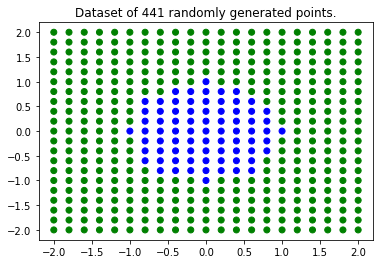

In [3]:
color = ['green' if each_label == -1 else 'blue' for each_label in label]
p = plt.scatter(data[:, 0], data[:, 1], c=color)
plt.title("Dataset of 441 randomly generated points.")
plt.show()

## Build Model

In [4]:
class RBFnn:
    def __init__(self, X, y, sigma):
        self.X = X
        self.y = y
        self.sigma = sigma
        self.centers = None
        self.w = None

    def square_distance(self, X1, X2):
        return np.dot((X1-X2).T, X1-X2)

    def fit_by_center(self): # method fit by a provided center
        self.centers = self.X
        self._fit()

    def fit_by_150_centers(self): # method fit by a random of 150 centers
        n,d = self.X.shape
        idx = np.random.randint(n, size=150)
        self.centers = self.X[idx]
        self._fit()

    def fit_by_sklearn(self): # fit by using K-means from the sklearn library
        kmeans = KMeans(n_clusters=150).fit(self.X)
        self.centers = kmeans.cluster_centers_
        self._fit()
    
    def _fit(self):
        # apply rbf algorithm compute similarity between input vector and prototype vector.
        G = self.get_G(self.X)
        self.w = np.dot(np.linalg.pinv(G), self.y)
    
    def get_G(self, x): # compute G
        n,d = x.shape[0], len(self.centers)
        G = np.zeros((n,d))
        for i in range(n):
            for j in range(d):
                G[i][j] = self.kernel_function(x[i],self.centers[j])
        return G
    
    def kernel_function(self, x, center):
        return np.exp(-1/(2*self.sigma**2)*self.square_distance(x,center))
    
    def predict(self, X):
        y_pred = np.dot(self.get_G(X),self.w)
        return y_pred

    def mse(self, y, y_pred): # loss function
        return np.power((y-y_pred),2).mean().item()
        
    def get_acc(self, y, y_pred):
        corr = 0
        for i in range(0, len(y)):
            corr += 1 if (y[i] == y_pred[i]) else 0
        return corr / len(y)

## Part 1 Use all points as centers

### Train the model

In [5]:
sigmas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
losses = []
test_accs = []
train_accs = []
for sigma in sigmas:
    net = RBFnn(X=train_data, y=train_label, sigma=sigma)
    net.fit_by_center()
    # prediction on data
    y_pred = net.predict(train_data)
    losses.append(net.mse(train_label, y_pred))
    # get final output with binary
    y_output = np.where(y_pred < 0, -1, 1)
    train_accs.append(net.get_acc(train_label, y_output))
    y_pred = net.predict(test_data)
    y_output = np.where(y_pred < 0, -1, 1)
    test_accs.append(net.get_acc(test_label, y_output))   

In [6]:
info = {'Sigma':sigmas, 'MSE': losses,'Train Accuracy':train_accs, 'Test Accuracy':test_accs}
frame = pd.DataFrame(info)
frame

,Sigma,MSE,Train Accuracy,Test Accuracy
0,0.1,4.952344e-30,1.000000,0.965909
1,0.2,2.805036e-28,1.000000,0.965909
2,0.3,3.011487e-22,1.000000,0.863636
3,0.4,2.710398e-15,1.000000,0.545455
4,0.5,7.807627e-08,1.000000,0.545455
5,0.6,3.502735e-03,1.000000,0.693182
6,0.7,1.590527e-02,1.000000,0.761364
7,0.8,2.729159e-02,1.000000,0.818182
8,0.9,3.441947e-02,1.000000,0.840909
9,1.0,3.879235e-02,0.997167,0.931818


### Plot Graphs

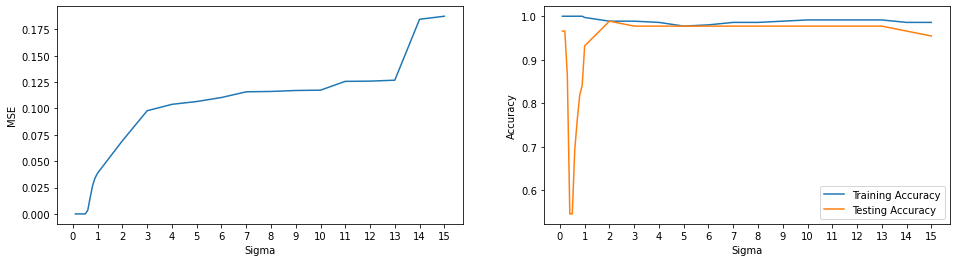

In [7]:
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(sigmas, losses)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.xticks([i for i in np.arange(0,16,1)])

plt.subplot(1, 2, 2)
plt.plot(sigmas, train_accs)
plt.plot(sigmas, test_accs)
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.xticks([i for i in np.arange(0,16,1)])
plt.show()

***
## Part 1 Write up
**Implementation Detail**
- We vary sigma [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
- Use all points as the center.

> From the plot MSE vs. Sigma, we observe that the error continues increasing as sigma get larger. The rate of change is large when sigma change from 0.1 to 3, and then it slowly increased when sigma change from 3 to 13. Another dramatic increase takes place when sigma is change from 13 to 14.

>From the plot Accuracy vs. Sigma, we notice that the model performs well in the training data since the training accuracy curve does not fluctuate much when sigma varies. The testing accuracy has a huge fluctuation when sigma is from 0.1 to 2, the model performs worst at $\sigma$ is 0.5, and it has the highest accuracy when $\sigma$ is 2. Coincidentally, this also matches the diameter of the input function so that our finding for the most efficient Radial basis bandwidth matches with our expectation based on input.  
After that, the test accuracy is decreasing slowly and it may due to overfitting. Therefore, we use $\sigma$ is 2 for part b in order to compare different models 

## Part 2a. 150 random centers

In [8]:
net2 = RBFnn(X=train_data, y=train_label, sigma=2)
net2.fit_by_150_centers()
y_pred = net2.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print("MSE = {:.6f}".format(net2.mse(train_label, y_output)))
print("train accuracy = {:.6f}".format(net2.get_acc(train_label, y_output)))
y_pred = net2.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print("test accuracy = {:.6f} ".format(net2.get_acc(test_label, y_output)))

MSE = 0.056657
train accuracy = 0.985836
test accuracy = 0.988636 


## part 2b. K-means 150 centers

In [9]:
net3 = RBFnn(X=train_data, y=train_label, sigma=2)
net3.fit_by_sklearn()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print("MSE = {:.6f}".format(net3.mse(train_label, y_output)))
print("train accuracy = {:.6f}".format(net3.get_acc(train_label, y_output)))
y_pred = net3.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print("test accuracy = {:.6f} ".format(net3.get_acc(test_label, y_output)))

MSE = 0.056657
train accuracy = 0.985836
test accuracy = 0.988636 


## Part 2 Write Up
**Implementation Detail**
- part 2a: use 150 centers, random selected from training data
- part 2b: use K-means algorithm to find 150 centers
- $\sigma$ = 2

> We notice that the test accuracy are the same for all three models when choose $\sigma$ is 2. As for the MSE, model use 150 random centers and K-means are slightly reduced compare to what we get from part 1 model. In general, all of the three models perform well using the given dataset.

## Reference
1. ECE657 Lecture slides Set3 
2. https://github.com/paulwong16/ECE657-Tools_of_Intelligent_Sys_Design/blob/master/a2/Q3.ipynb
3. https://github.com/rkarwayun/ECE657/blob/master/RBF%20NN/RBF_NN.ipynb